In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm
pd.options.display.max_columns = None
pd.options.display.max_rows = 200
num_games = 10

In [7]:
merge_2020 = pd.read_csv(f'NewData/Merge(19-20)[{num_games}].csv')
merge_2019 = pd.read_csv(f'NewData/Merge(18-19)[{num_games}].csv')
print(merge_2020.shape, merge_2019.shape)
df_list = [('18-19', merge_2019), ('19-20', merge_2020)]
merge_2020.head(5)

(20378, 31) (27826, 31)


,GameID,Name,Date,Team,FDP,FDS,FD_change,FD_pos,OPP,Home,Away,MP,FG,FGA,FG%,3P,3PA,3P%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,+-
0,20191022-lal-lac,Terance Mann,20191022,lac,0.0,3500.0,NaN,2.0,lal,0,1,0.00,0,0,0.0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0
1,20191022-lal-lac,Patrick Patterson,20191022,lac,7.6,3500.0,NaN,4.0,lal,0,1,5.17,0,1,0.0,0,1,0.0,0,0,0.0,0,0,0,0,0,0,0,1,0,-5
2,20191022-lal-lac,Montrezl Harrell,20191022,lac,34.4,7300.0,NaN,5.0,lal,0,1,8.30,2,5,0.4,0,0,0.0,0,0,0.0,1,1,2,0,0,0,1,2,4,6
3,20191022-lal-lac,Patrick Beverley,20191022,lac,24.0,5100.0,NaN,1.0,lal,0,1,9.40,0,2,0.0,0,2,0.0,0,0,0.0,1,3,4,0,0,0,1,1,0,-5
4,20191022-lal-lac,Landry Shamet,20191022,lac,14.6,4200.0,NaN,1.0,lal,0,1,5.50,0,1,0.0,0,1,0.0,0,0,0.0,0,1,1,0,0,0,0,0,0,-7


### Most Fantasy Points (SUM)

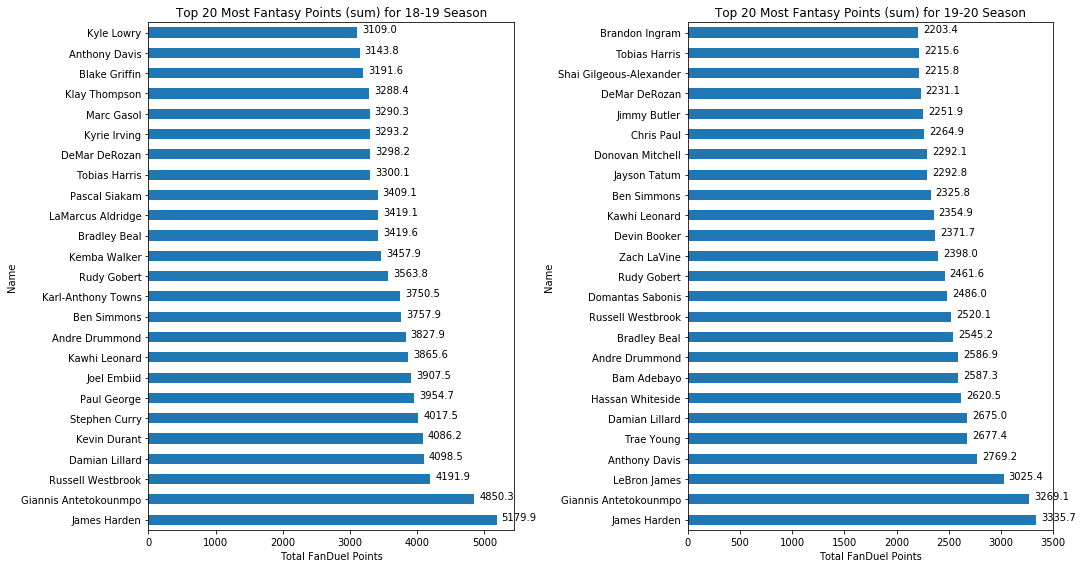

In [8]:
def most_fantasy_points(df_list): 
    '''Takes in a df and plots the top 25 players with the most total fanduel points'''
    fig, ax = plt.subplots(ncols = len(df_list), figsize = (15,8))
    for pos, a in enumerate(ax): 
        season,df = df_list[pos]
        df = df.groupby('Name')['FDP'].sum().sort_values(ascending = False).head(25).plot.barh(ax = a)
        plt.tight_layout()
        a.title.set_text(f'Top 20 Most Fantasy Points (sum) for {season} Season')
        for p in a.patches: 
#             a.annotate(f'{round(p.get_height(),2)}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), 
#                        textcoords='offset points')# (p.get_x(), p.get_height()+1))
            a.annotate(f"{round(p.get_width(), 2)}", (p.get_x() + p.get_width(), p.get_y()-.25), xytext=(5, 10), textcoords='offset points')
        a.set_xlabel('Total FanDuel Points')

        
most_fantasy_points(df_list)

### Top 25 Avg Fantasy Points

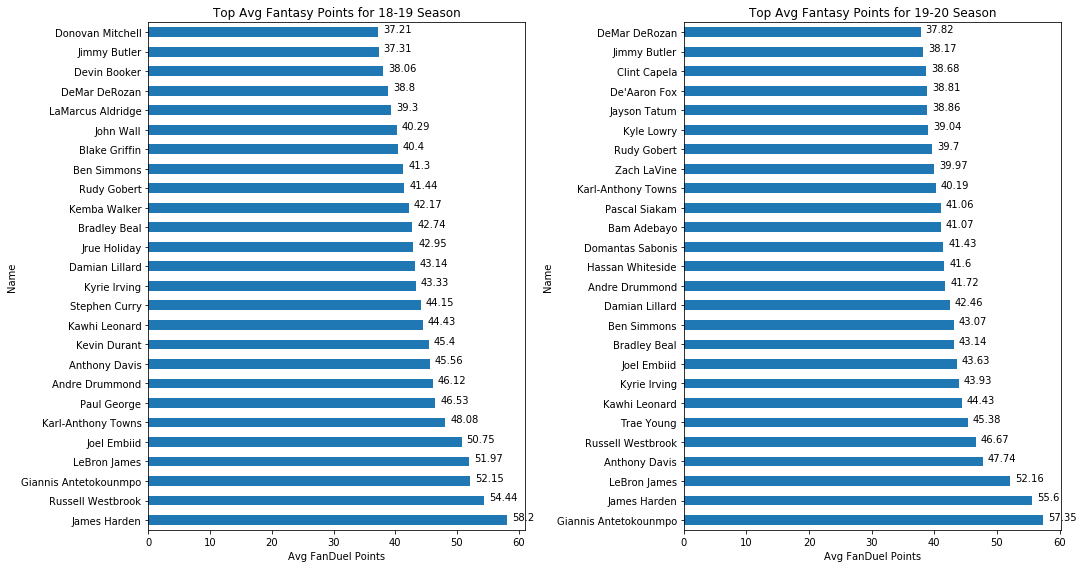

In [9]:
def highest_avg_fdp(df_list):
    '''Takes in a df and plots the top 25 players with the highest average fanduel points'''
    fig, ax = plt.subplots(ncols = len(df_list), figsize = (15,8))
    for pos, a in enumerate(ax): 
        season,df = df_list[pos]
        df = df.groupby('Name')['FDP'].mean().sort_values(ascending = False)[:26].plot.barh(ax = a)

        plt.tight_layout()
        a.title.set_text(f'Top Avg Fantasy Points for {season} Season')
        for p in a.patches: 
            a.annotate(f"{round(p.get_width(), 2)}", (p.get_x() + p.get_width(), p.get_y()-.25), xytext=(5, 10), textcoords='offset points')
        a.set_xlabel('Avg FanDuel Points')
highest_avg_fdp(df_list)

### Compare Salary and Performance (scatter)

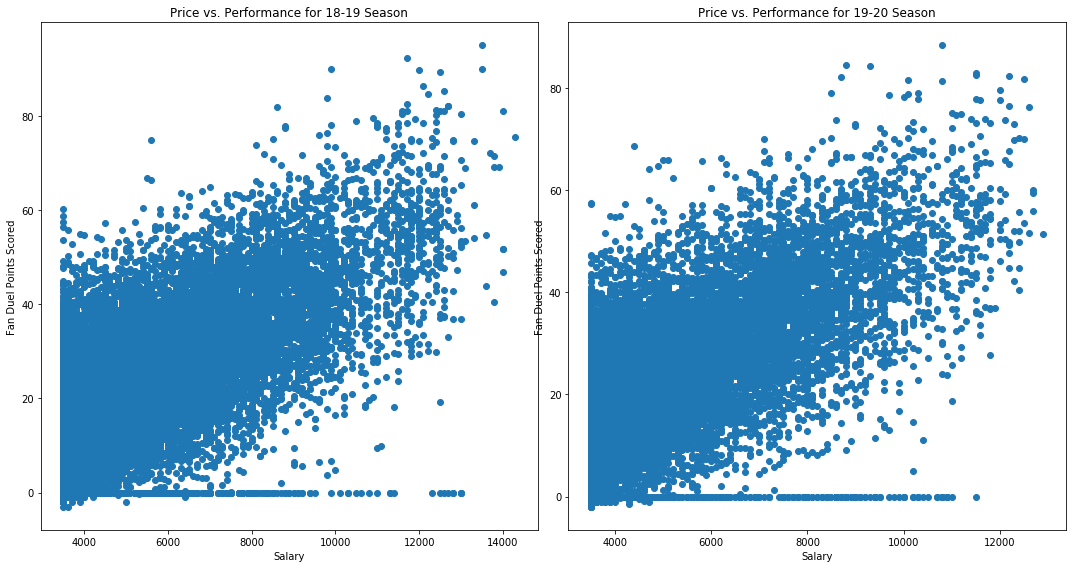

In [13]:
def salary_performance(df_list):
    '''Will create a scatter plot to compare performance vs actual salary'''
    fig, ax = plt.subplots(ncols = len(df_list), figsize = (15,8))
    for pos, a in enumerate(ax): 
        season,df = df_list[pos]
        df = df[df['FDS'] >= 3000]
        x = np.array(df['FDS'])
        y = np.array(df.FDP)
        a.scatter(x,y)

        plt.tight_layout()
        a.title.set_text(f'Price vs. Performance for {season} Season')
        a.set_xlabel('Salary')
        a.set_ylabel('Fan Duel Points Scored')
        

salary_performance(df_list)
    

### Performance vs. Home/Away in the top 25 highest FDP games

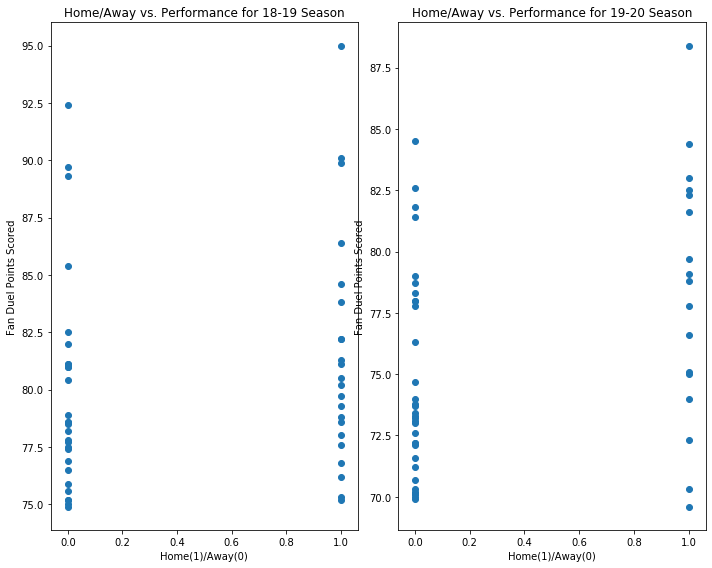

In [6]:
def performance_home_away(df_list):
    '''Will make a scatter plot to compare performance vs. being home or away in the top 25 most FDP games'''
    fig, ax = plt.subplots(ncols = len(df_list), figsize = (10,8))
    for pos, a in enumerate(ax): 
        season,df = df_list[pos]
        df = df.sort_values(by = 'FDP', ascending = False).head(50)
        
        x = np.array(df.Home)
        y = np.array(df.FDP)
        a.scatter(x,y)

        plt.tight_layout()
        a.title.set_text(f'Home/Away vs. Performance for {season} Season')
        a.set_xlabel('Home(1)/Away(0)')
        a.set_ylabel('Fan Duel Points Scored')
        

performance_home_away(df_list)

### Histogram showing distribution of players salary

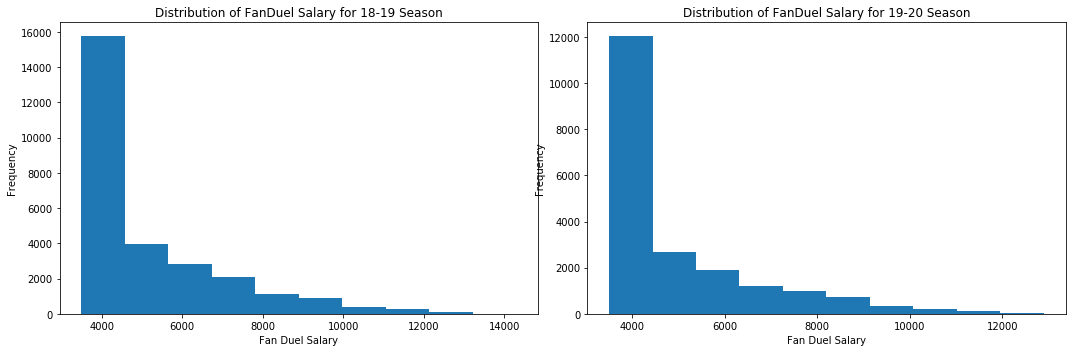

In [11]:
def salary_dist(df_list): 
    '''This function will show the distribution of players salary across each season'''
    fig, ax = plt.subplots(ncols = len(df_list), figsize = (15,5))
    for pos, a in enumerate(ax): 
        season,df = df_list[pos]
        #df = df.sort_values(by = 'FDP', ascending = False).head(50)
        
        x = np.array(df['FD Sal'])
        #y = np.array(df.FDP)
        a.hist(x)

        plt.tight_layout()
        a.title.set_text(f'Distribution of FanDuel Salary for {season} Season')
        a.set_xlabel('Fan Duel Salary')
        a.set_ylabel('Frequency')
salary_dist(df_list)

### Comapring Risk vs. Performance

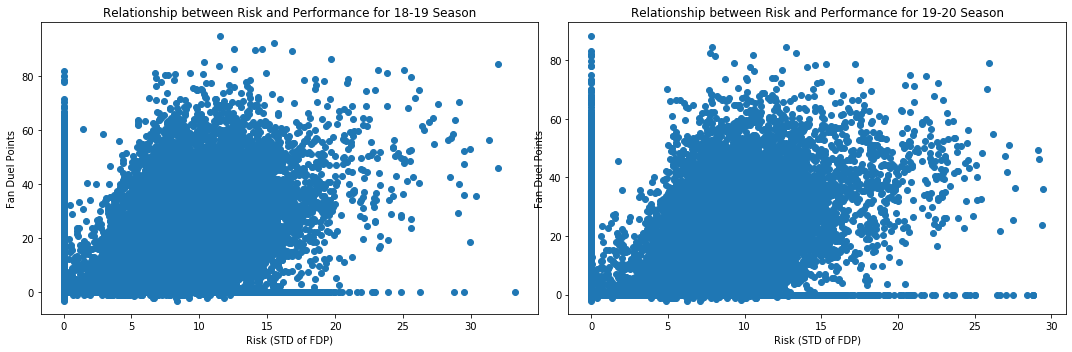

In [8]:
def risk_performance(df_list): 
    '''This function will plot the relationship between risk (std) and actual performance'''
    fig, ax = plt.subplots(ncols = len(df_list), figsize = (15,5))
    for pos, a in enumerate(ax): 
        season,df = df_list[pos]
        #df = df.sort_values(by = 'FDP', ascending = False).head(50)
        
        x = np.array(df['Risk'])
        y = np.array(df.FDP)
        a.scatter(x, y)

        plt.tight_layout()
        a.title.set_text(f'Relationship between Risk and Performance for {season} Season')
        a.set_xlabel('Risk (STD of FDP)')
        a.set_ylabel('Fan Duel Points')
        

risk_performance(df_list)